In this part we take an activity recognition dataset- data  and perform human activity recognition. The dataset was created by recording 30 participants performing activities of daily living (ADL) while wearing a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed namely WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING. The dataset consists of more than 7000 datapoints.



This task can be viewed as a tabular classification task where we can leverage the tubular techniques like decision models. First, we begin by loading and understanding the distribution of the data.



After this we use the labelencoder to convert the string labels into integer classes so that it can be fed into the models for training. Then we move onto to use Principal Component Analysis(PCA). This is because the original data has too many features which can hamper the model training. So, by using PCA we project the higher dimension data into lower dimension so as to decrease the number of features. Finally we use the the Random Forest classifier, a tree based algorithm from sklearn to make the predictions.


In [2]:
!pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d uciml/human-activity-recognition-with-smartphones

Dataset URL: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
License(s): CC0-1.0
 98% 24.0M/24.5M [00:02<00:00, 21.3MB/s]
100% 24.5M/24.5M [00:02<00:00, 12.2MB/s]


In [5]:
!unzip /content/human-activity-recognition-with-smartphones.zip

Archive:  /content/human-activity-recognition-with-smartphones.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [7]:
df.Activity.value_counts()

,count
Activity,
LAYING,1407
STANDING,1374
SITTING,1286
WALKING,1226
WALKING_UPSTAIRS,1073
WALKING_DOWNSTAIRS,986


In [8]:
df.shape

(7352, 563)

In [9]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [11]:
X_train = df.iloc[:,0:len(df.columns)-1]
Y_train = df.iloc[:,-1]

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [13]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


In [14]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

pca.fit(X_train)

train_x_pca = pca.transform(X_train)

print(pca.n_components_)
print(pca.explained_variance_)

27
[81.16291788 34.28596447  2.72791827  2.29294473  1.04143062  0.94302608
  0.70697697  0.65385319  0.59223677  0.53651932  0.47765039  0.42035141
  0.37433617  0.32242293  0.30120497  0.27337432  0.26242838  0.25955521
  0.23984823  0.23465595  0.22832294  0.21824571  0.20678987  0.19576309
  0.18881297  0.1813889   0.1766936 ]


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_x_pca, Y_train)

RandomForestClassifier()

In [16]:
clf.score(train_x_pca,Y_train)

1.0

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(train_x_pca, Y_train)

GradientBoostingClassifier()

In [18]:
clf.score(train_x_pca,Y_train)

0.9794613710554951

In [19]:
print(train_x_pca[0])
print('Prediction: ', clf.predict(train_x_pca[0].reshape(1,-1)))

[-15.7272239   -7.24625881   0.46558936   1.45368068  -1.41995403
   1.48815208   0.30634986   0.45740915   0.52319453  -1.13872652
  -0.3621355   -0.01698166  -0.05863601   0.87477373   1.47823156
   1.22539863   0.34717092  -0.07968707  -0.50421908   0.7096581
   0.45056054   0.12789526   0.2011846   -0.21848      0.36474246
  -0.57101935   0.0897792 ]
Prediction:  [2]


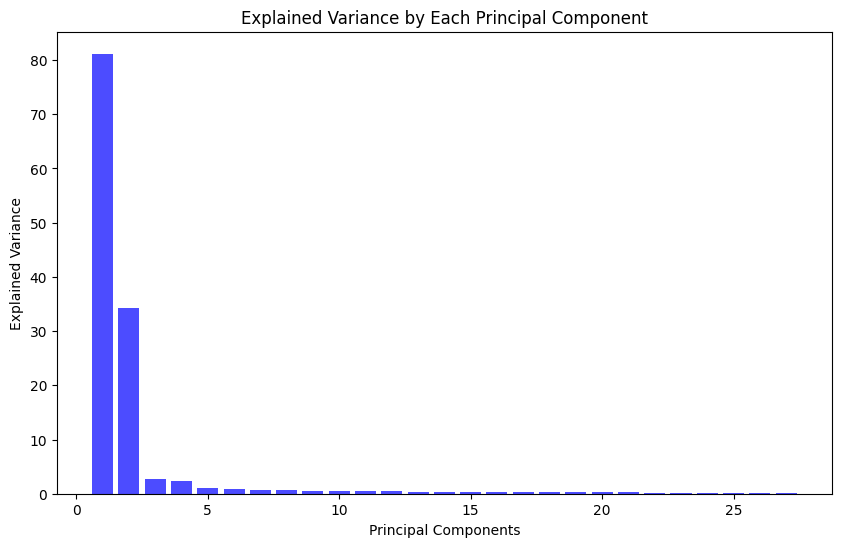

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Explained Variance (individual)
plt.figure(figsize=(10, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Each Principal Component')
plt.show()

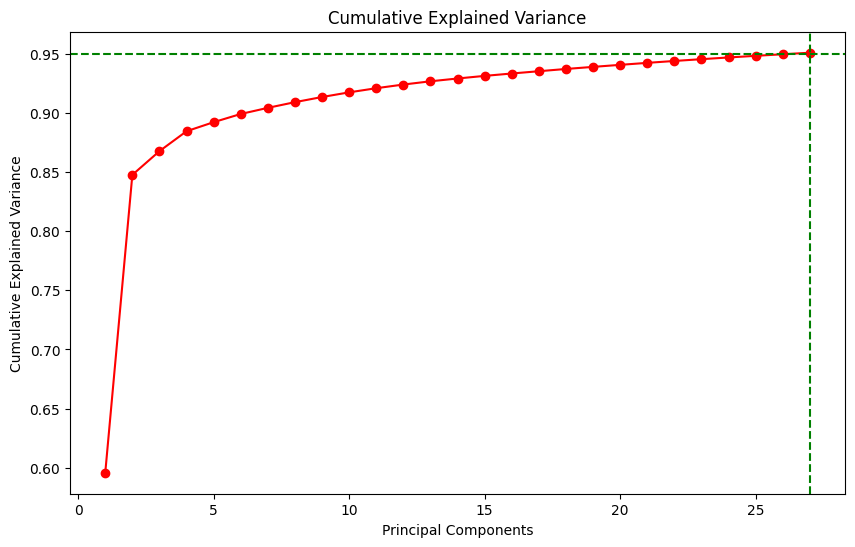

In [21]:
# 2. Cumulative Explained Variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='green', linestyle='--')  # 95% variance threshold
plt.axvline(x=pca.n_components_, color='green', linestyle='--')  # Mark the number of components selected
plt.show()